In [60]:
import pandas as pd

# Load CSV file into a DataFrame
# Replace 'your_file.csv' with the actual path to your CSV file
df = pd.read_csv('C:/Users/dyros/Desktop/dummy_ws/data/AA_joint6.csv')

# Display the first few rows of the DataFrame
df


,%time,field.header.seq,field.header.stamp,field.header.frame_id,field.pose_array.header.seq,field.pose_array.header.stamp,field.pose_array.header.frame_id,field.pose_array.poses0.position.x,field.pose_array.poses0.position.y,field.pose_array.poses0.position.z,...,field.angles2,field.angles3,field.angles4,field.angles5,field.angles6,field.angles7,field.angles8,field.angles9,field.angles10,field.trigger_flag
0,1754454427051511800,26016,1754454427050260800,hmd_frame,0,1754454427050260800,hmd_frame,0.047344,-0.076403,-0.298504,...,3.263790,11.600160,47.335171,-32.534782,-31.315184,-28.487900,0.419283,-0.565975,0.001809,0
1,1754454427071251500,26017,1754454427069918400,hmd_frame,0,1754454427069918400,hmd_frame,0.045785,-0.077209,-0.298523,...,3.284322,11.532501,47.394913,-32.541439,-31.321999,-28.482290,0.421208,-0.566854,-0.002880,0
2,1754454427090701000,26018,1754454427089725300,hmd_frame,0,1754454427089725300,hmd_frame,0.044792,-0.076935,-0.298535,...,3.292874,11.487702,47.391308,-32.546097,-31.327364,-28.478363,0.420943,-0.567497,-0.004516,0
3,1754454427110037700,26019,1754454427108937900,hmd_frame,0,1754454427108937900,hmd_frame,0.043884,-0.076330,-0.298566,...,3.295983,11.454029,47.455242,-32.562283,-31.343454,-28.475613,0.419742,-0.567673,-0.005611,0
4,1754454427129280600,26020,1754454427128265100,hmd_frame,0,1754454427128265100,hmd_frame,0.044840,-0.075302,-0.298709,...,3.225565,11.427519,47.486778,-32.574749,-31.355309,-28.473688,0.417204,-0.567386,-0.001318,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14668,1754454714048861600,40684,1754454714047700400,hmd_frame,0,1754454714047700400,hmd_frame,0.013478,-0.041941,-0.301085,...,3.606799,11.607050,41.943489,-35.609943,-33.694370,-31.151438,0.404668,-0.670810,-0.158102,0
14669,1754454714068028500,40685,1754454714067043000,hmd_frame,0,1754454714067043000,hmd_frame,0.013586,-0.041994,-0.300989,...,3.645956,11.660752,41.954750,-35.578659,-33.692780,-31.151871,0.404789,-0.670887,-0.158407,0
14670,1754454714087729900,40686,1754454714086464200,hmd_frame,0,1754454714086464200,hmd_frame,0.013994,-0.041921,-0.300991,...,3.672036,11.696270,41.897205,-35.557915,-33.699356,-31.159639,0.405094,-0.669805,-0.158113,0
14671,1754454714107494000,40687,1754454714106413900,hmd_frame,0,1754454714106413900,hmd_frame,0.014494,-0.041745,-0.301002,...,3.694793,11.623228,41.853840,-35.540047,-33.704266,-31.165216,0.404631,-0.669126,-0.157146,0


In [61]:
matching_indices = df[df['field.trigger_flag'] == 1].index
matching_indices

Index([   60,   867,   935,  1526,  1806,  2863,  3114,  3686,  3854,  3992,
        4608,  5649,  5868,  6897,  7165,  7330,  7496,  7738,  7891,  8833,
        9409, 10302, 10719, 10842, 11060, 11493, 11717, 11989, 12448, 12641,
       12942, 13911, 14184, 14583],
      dtype='int64')

In [62]:

columns_to_drop = df.columns[0:7]
print(df.columns)
cols_to_check = ['field.pose_array.poses0.position.x', 'field.pose_array.poses0.position.y',"field.pose_array.poses0.position.z"]
df = df.drop(columns=columns_to_drop)
dup_mask = df.duplicated(subset=cols_to_check, keep=False)

# 3) Keep only rows that are unique in the specified columns
df = df[~dup_mask].reset_index(drop=True)
# Step 3: Check remaining columns

# columns_to_drop = df.columns[[1, 3]]  # e.g., ['age', 'email']
df
# # Step 2: Drop those columns
# df = df.drop(columns=columns_to_drop)

Index(['%time', 'field.header.seq', 'field.header.stamp',
       'field.header.frame_id', 'field.pose_array.header.seq',
       'field.pose_array.header.stamp', 'field.pose_array.header.frame_id',
       'field.pose_array.poses0.position.x',
       'field.pose_array.poses0.position.y',
       'field.pose_array.poses0.position.z',
       ...
       'field.angles2', 'field.angles3', 'field.angles4', 'field.angles5',
       'field.angles6', 'field.angles7', 'field.angles8', 'field.angles9',
       'field.angles10', 'field.trigger_flag'],
      dtype='object', length=201)


,field.pose_array.poses0.position.x,field.pose_array.poses0.position.y,field.pose_array.poses0.position.z,field.pose_array.poses0.orientation.x,field.pose_array.poses0.orientation.y,field.pose_array.poses0.orientation.z,field.pose_array.poses0.orientation.w,field.pose_array.poses1.position.x,field.pose_array.poses1.position.y,field.pose_array.poses1.position.z,...,field.angles2,field.angles3,field.angles4,field.angles5,field.angles6,field.angles7,field.angles8,field.angles9,field.angles10,field.trigger_flag
0,0.047344,-0.076403,-0.298504,0.151301,-0.522602,0.805556,-0.234682,0.070255,-0.112290,-0.277588,...,3.263790,11.600160,47.335171,-32.534782,-31.315184,-28.487900,0.419283,-0.565975,0.001809,0
1,0.045785,-0.077209,-0.298523,0.153194,-0.522309,0.805599,-0.233957,0.068778,-0.113202,-0.277173,...,3.284322,11.532501,47.394913,-32.541439,-31.321999,-28.482290,0.421208,-0.566854,-0.002880,0
2,0.044792,-0.076935,-0.298535,0.154052,-0.522558,0.805328,-0.233769,0.067877,-0.112920,-0.277233,...,3.292874,11.487702,47.391308,-32.546097,-31.327364,-28.478363,0.420943,-0.567497,-0.004516,0
3,0.043884,-0.076330,-0.298566,0.154679,-0.523157,0.804909,-0.233461,0.066950,-0.112330,-0.277343,...,3.295983,11.454029,47.455242,-32.562283,-31.343454,-28.475613,0.419742,-0.567673,-0.005611,0
4,0.044840,-0.075302,-0.298709,0.153173,-0.523697,0.804609,-0.234273,0.067894,-0.111356,-0.277493,...,3.225565,11.427519,47.486778,-32.574749,-31.355309,-28.473688,0.417204,-0.567386,-0.001318,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14169,0.013478,-0.041941,-0.301085,0.242908,-0.539979,0.771490,-0.232855,0.043174,-0.075589,-0.284876,...,3.606799,11.607050,41.943489,-35.609943,-33.694370,-31.151438,0.404668,-0.670810,-0.158102,0
14170,0.013586,-0.041994,-0.300989,0.243031,-0.539963,0.771474,-0.232818,0.043257,-0.075648,-0.284779,...,3.645956,11.660752,41.954750,-35.578659,-33.692780,-31.151871,0.404789,-0.670887,-0.158407,0
14171,0.013994,-0.041921,-0.300991,0.242613,-0.539875,0.771762,-0.232501,0.043643,-0.075601,-0.284764,...,3.672036,11.696270,41.897205,-35.557915,-33.699356,-31.159639,0.405094,-0.669805,-0.158113,0
14172,0.014494,-0.041745,-0.301002,0.242125,-0.539981,0.771861,-0.232435,0.044095,-0.075447,-0.284762,...,3.694793,11.623228,41.853840,-35.540047,-33.704266,-31.165216,0.404631,-0.669126,-0.157146,0


In [63]:
matching_indices = df[df['field.trigger_flag'] == 1].index
print(matching_indices)
print(len(matching_indices)%2==0)


Index([   60,   867,   935,  1526,  1806,  2863,  3114,  3686,  3854,  3992,
        4608,  5503,  5722,  6637,  6905,  7070,  7236,  7478,  7631,  8573,
        9149, 10042, 10459, 10582, 10800, 11233, 11457, 11729, 12188, 12381,
       12682, 13419, 13692, 14084],
      dtype='int64')
True


In [64]:
import pandas as pd
from typing import Union, List
import numpy as np

def apply_reference_values(
    df: pd.DataFrame,
    row_start: int,
    row_end: int,
    col_indices: Union[slice, List[int], tuple],
    noise_std: float = 1.0
) -> pd.DataFrame:
    """
    Overwrite values in specified column range for rows from row_start to row_end - 1
    using the values from row_start as reference.

    Parameters:
    - df (pd.DataFrame): the DataFrame to modify
    - row_start (int): start index (inclusive)
    - row_end (int): end index (exclusive)
    - col_indices (slice or list or tuple): column indices to be modified

    Returns:
    - pd.DataFrame: modified DataFrame (copy)
    """
    df_copy = df.copy()

    # Convert column indices (int or slice) to actual column names
    if isinstance(col_indices, slice):
        cols = df.columns[col_indices]
    elif isinstance(col_indices, (list, tuple)):
        cols = df.columns[list(col_indices)]
    else:
        raise TypeError("col_indices must be a slice, list, or tuple of integers")

    # Get reference values from the start row
    reference_values = df.loc[row_start, cols]

    # Overwrite target range rows with reference values
    noise = np.random.normal(loc=0.0, scale=noise_std, size=df_copy.loc[row_start:row_end - 1, cols].shape)
    df_copy.loc[row_start:row_end - 1, cols] = reference_values.values
    df_copy.loc[row_start:row_end - 1, cols] = df_copy.loc[row_start:row_end - 1, cols] + noise

    return df_copy


In [65]:
std_1 = 0.5  # for -9:-5
std_2 = 1  # for -5:-1

new_df = df.copy()

for i in range(len(matching_indices) // 2):
    row_start = matching_indices[2 * i]
    row_end = matching_indices[2 * i + 1]
    
    # First range: columns -9:-5 with std_1
    new_df = apply_reference_values(
        new_df,
        row_start=row_start,
        row_end=row_end,
        col_indices=slice(-12, -8),
        noise_std=std_1
    )
    
    # Second range: columns -5:-1 with std_2
    new_df = apply_reference_values(
        new_df,
        row_start=row_start,
        row_end=row_end,
        col_indices=slice(-8, -4),
        noise_std=std_2
    )


In [66]:
new_df.to_csv('modified_output_AA_joint6.csv', index=False, encoding='utf-8-sig')

In [68]:
import pandas as pd
import glob
import os


file_paths = [
    'modified_output_AA_joint1.csv',
    'modified_output_AA_joint2.csv',
    'modified_output_AA_joint3.csv',
    'modified_output_AA_joint4.csv',
    'modified_output_AA_joint5.csv',
    'modified_output_AA_joint6.csv', 
]


df_list = [pd.read_csv(path) for path in file_paths]


modify_df = pd.concat(df_list, ignore_index=True)
modify_df = modify_df.dropna()


cols_to_check = ['field.pose_array.poses0.position.x', 'field.pose_array.poses0.position.y',"field.pose_array.poses0.position.z"]
dup_mask = modify_df.duplicated(subset=cols_to_check, keep=False)

# 3) Keep only rows that are unique in the specified columns
modify_df = modify_df[~dup_mask].reset_index(drop=True)


In [ ]:
def compute_euler_with_fixed_ref(q_ref: np.ndarray,
                                 q_targets: np.ndarray):
    """
    Compute roll, pitch, yaw of each q_target relative to a fixed q_ref.
    
    Parameters:
      q_ref      : array of shape (4,), [w, x, y, z]
      q_targets  : array of shape (N,4), [w, x, y, z] per row
    
    Returns:
      roll       : array of shape (N,), rotation about X-axis (radians)
      pitch      : array of shape (N,), rotation about Y-axis (radians)
      yaw        : array of shape (N,), rotation about Z-axis (radians)
    """
    # 1) Normalize reference quaternion
    q1 = q_ref.astype(float)
    q1 /= np.linalg.norm(q1)
    
    # 2) Normalize all target quaternions
    norms = np.linalg.norm(q_targets, axis=1, keepdims=True)
    q2 = q_targets.astype(float) / norms

    # 3) Conjugate of q_ref: (w, -x, -y, -z)
    q1_conj = q1.copy()
    q1_conj[1:] *= -1  # invert vector part

    # 4) Broadcast q1_conj to shape (N,4) for multiplication
    w1, x1, y1, z1 = q1_conj
    w2, x2, y2, z2 = q2.T

    # quaternion multiplication q_rel = q1_conj * q2
    w_rel =  w1*w2 - x1*x2 - y1*y2 - z1*z2
    x_rel =  w1*x2 + x1*w2 + y1*z2 - z1*y2
    y_rel =  w1*y2 - x1*z2 + y1*w2 + z1*x2
    z_rel =  w1*z2 + x1*y2 - y1*x2 + z1*w2

    # 5) Convert to Euler angles
    roll  = np.arctan2(2*(w_rel*x_rel + y_rel*z_rel),
                       1 - 2*(x_rel**2 + y_rel**2))
    pitch = np.arcsin(2*(w_rel*y_rel - z_rel*x_rel))
    yaw   = np.arctan2(2*(w_rel*z_rel + x_rel*y_rel),
                       1 - 2*(y_rel**2 + z_rel**2))

    return roll, pitch, yaw

def add_euler_columns(df: 'pd.DataFrame',
                      q_ref: np.ndarray,
                      target_cols: list,
                      col_names: list = ['roll', 'pitch', 'yaw']
                     ) -> 'pd.DataFrame':
    """
    Compute roll, pitch, yaw angles for each quaternion in df[target_cols]
    relative to a fixed reference quaternion q_ref, and assign them as new columns.

    Parameters:
      df         : pd.DataFrame containing quaternion data
      q_ref      : np.ndarray of shape (4,), [w, x, y, z]
      target_cols: list of 4 column names in df representing [w, x, y, z]
      col_names  : list of 3 names for the new Euler angle columns

    Returns:
      df_out     : a new DataFrame with the added Euler columns
    """
    # 1) Extract target quaternions as NumPy array
    q_targets = df[target_cols].to_numpy()  # shape (N,4)

    # 2) Compute Euler angles relative to q_ref
    roll_vals, pitch_vals, yaw_vals = compute_euler_with_fixed_ref(q_ref, q_targets)

    # 3) Assign to new columns in a copy of the DataFrame
    df_out = df.copy()
    df_out[col_names[0]] = roll_vals
    df_out[col_names[1]] = pitch_vals
    df_out[col_names[2]] = yaw_vals

    return df_out
# ===== Usage Example =====

# suppose df is your DataFrame with these columns:
# ['ref_w','ref_x','ref_y','ref_z','tgt_w','tgt_x','tgt_y','tgt_z']
import pandas as pd
df = modify_df

# extract as numpy arrays
# Suppose df is your DataFrame, q_ref is defined
target_cols = ['field.pose_array.poses0.orientation.w',
               'field.pose_array.poses0.orientation.x',
               'field.pose_array.poses0.orientation.y',
               'field.pose_array.poses0.orientation.z']
q_ref = np.array([0, 0, -np.sqrt(0.5), np.sqrt(0.5)])

df_with_euler = add_euler_columns(df, q_ref, target_cols,col_names=['field.angles8', 'field.angles9', 'field.angles10'])
print(df_with_euler[['field.angles8', 'field.angles9', 'field.angles10']].head())





In [13]:
import pandas as pd
import glob
import os


file_paths = [
    'modified_output_AA1.csv',
    'modified_output_AA2.csv',
    'modified_output_AA3.csv',
    'modified_output_AA4.csv',
    'modified_output_AA5.csv',
    'modified_output_AA6.csv',
    'modified_output_AA7.csv',
    'modified_output_AA8.csv',
    'modified_output_AA9.csv',
    'modified_output_AA10.csv',
    'modified_output_AA_joint1.csv',
    'modified_output_AA_joint2.csv',
    'modified_output_AA_joint3.csv',
    'modified_output_AA_joint4.csv',
    'modified_output_AA_joint5.csv',
    'modified_output_AA_joint6.csv'
]


df_list = [pd.read_csv(path) for path in file_paths]


merged_df = pd.concat(df_list, ignore_index=True)
merged_df = merged_df.dropna()

print(merged_df.shape) 
print(merged_df.head())




(149211, 194)
   field.pose_array.poses0.position.x  field.pose_array.poses0.position.y  \
0                            0.077601                           -0.073579   
1                            0.077219                           -0.073615   
2                            0.076785                           -0.073777   
3                            0.076436                           -0.073839   
4                            0.076329                           -0.073971   

   field.pose_array.poses0.position.z  field.pose_array.poses0.orientation.x  \
0                           -0.300218                               0.112165   
1                           -0.300304                               0.112585   
2                           -0.300119                               0.112993   
3                           -0.299956                               0.113315   
4                           -0.299865                               0.113127   

   field.pose_array.poses0.orientation.y  

In [14]:
cols_to_check = ['field.pose_array.poses0.position.x', 'field.pose_array.poses0.position.y',"field.pose_array.poses0.position.z"]
dup_mask = merged_df.duplicated(subset=cols_to_check, keep=False)

# 3) Keep only rows that are unique in the specified columns
merged_df = merged_df[~dup_mask].reset_index(drop=True)

# df_merged = pd.concat([df_with_euler, merged_df], axis=0, ignore_index=True)
# df_merged

In [15]:
import re

# List of keywords to remove
keywords = ['orientation', 'poses0', 'poses21', 'poses22', 'poses23', 'poses24', 'poses25']
pattern = '|'.join(keywords)

# 1) Find columns containing any of the keywords
# mask_any_keyword = df_merged.columns.str.contains(pattern)
mask_any_keyword = merged_df.columns.str.contains(pattern)

# 2) Identify columns that contain both 'orientation' and 'poses0'
# mask_both = (
#     df_merged.columns.str.contains('orientation') &
#     df_merged.columns.str.contains('poses0')
# )

mask_both = (
    merged_df.columns.str.contains('orientation') &
    merged_df.columns.str.contains('poses0')
)

# 3) Build final mask:
#    - Keep if NOT containing any keyword, OR
#    - Keep if containing both 'orientation' and 'poses0'
final_mask = ~mask_any_keyword 

# 4) Apply mask to DataFrame
# df_merged = df_merged.loc[:, final_mask]
df_merged = merged_df.loc[:, final_mask]


In [16]:
cols = df_merged.columns.tolist()
new_cols = (
    cols[:60] +
    cols[68:71] +
    cols[60:68] +    
    [cols[71]]
)
df_merged = df_merged[new_cols]

In [17]:
df_merged = df_merged[df_merged['field.angles1'] >= -25]
df_merged = df_merged[df_merged['field.angles2'] >= -25]
df_merged = df_merged[df_merged['field.angles3'] >= -25]

df_merged = df_merged[df_merged['field.angles1'] <= 25]
df_merged = df_merged[df_merged['field.angles2'] <= 25]
df_merged = df_merged[df_merged['field.angles3'] <= 25]

In [18]:
import torch

df_merged.columns
X = df_merged.iloc[:, :-9].values         
y = df_merged.iloc[:, -8:-5].values          


X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

X.shape


(148975, 63)

In [19]:
import torch
import torch.nn.functional as F

def remove_rows_with_outliers(
    y_tensor: torch.Tensor,
    X: torch.Tensor,
    window_size: int = 31,
    abs_diff_thresh: float = 10.0
):
    """
    Detect outliers in each column of y_tensor by
      |y[t,c] - local_window_mean[t,c]| > abs_diff_thresh,
    then remove any row t containing an outlier in ANY column,
    from BOTH y_tensor and X.

    Parameters:
      y_tensor        : torch.Tensor of shape [T, C]
      X               : torch.Tensor of shape [T, ...] (same first dim T)
      window_size     : odd int, size of the rolling-mean window
      abs_diff_thresh : float, absolute difference threshold

    Returns:
      clean_y         : torch.Tensor [T - num_removed, C]
      clean_X         : torch.Tensor [T - num_removed, ...]
      removed_indices : 1D LongTensor of removed row indices
    """
    assert y_tensor.dim() == 2 and X.dim() >= 2
    T, C = y_tensor.shape
    assert X.size(0) == T, "X must have same number of rows as y_tensor"
    assert window_size % 2 == 1, "window_size must be odd"

    pad = window_size // 2
    kernel = torch.ones(window_size, device=y_tensor.device) / window_size
    kernel = kernel.view(1, 1, -1)

    # 마스크 초기화
    remove_mask = torch.zeros(T, dtype=torch.bool, device=y_tensor.device)

    # 각 컬럼마다 rolling mean 계산 후 이상치 마킹
    for c in range(C):
        ts = y_tensor[:, c].view(1,1,T)
        ts_padded = F.pad(ts, (pad, pad), mode='reflect')
        rolling_mean = F.conv1d(ts_padded, kernel).view(-1)
        diff = (y_tensor[:, c] - rolling_mean).abs()
        remove_mask |= (diff > abs_diff_thresh)

    removed_indices = remove_mask.nonzero(as_tuple=True)[0]

    # 행 제거
    clean_y = y_tensor[~remove_mask]
    clean_X = X[~remove_mask]

    return clean_y, clean_X, removed_indices


# ===== Usage Example =====
# y_tensor: [T, 3], X: [T, D]
clean_y, clean_X, removed_idx = remove_rows_with_outliers(
    y_tensor,
    X_tensor,
    window_size=401,
    abs_diff_thresh=5.0
)

print("Removed row indices:", removed_idx.tolist())
print("Original shapes:", y_tensor.shape, X.shape)
print("Cleaned shapes: ", clean_y.shape, clean_X.shape)


Removed row indices: [793, 1311, 1319, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1421, 1423, 1424, 1426, 1431, 1432, 1433, 1436, 1450, 1893, 1894, 1897, 1900, 1906, 1907, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1

In [20]:
torch.save((clean_X, clean_y), 'dataset_2.pt')

In [11]:
import pandas as pd
import torch
import joblib
import numpy as np


test_df = pd.read_csv("modified_output_AA_test.csv")
test_df = test_df.dropna()
cols_to_check = ['field.pose_array.poses0.position.x', 'field.pose_array.poses0.position.y',"field.pose_array.poses0.position.z"]
dup_mask = test_df.duplicated(subset=cols_to_check, keep=False)

test_df = add_euler_columns(test_df, q_ref, target_cols,col_names=['field.angles8', 'field.angles9', 'field.angles10'])

# 3) Keep only rows that are unique in the specified columns
test_df = test_df[~dup_mask].reset_index(drop=True)
test_df = test_df[new_cols]

import re

# List of keywords to remove
keywords = ['orientation', 'poses0', 'poses21', 'poses22', 'poses23', 'poses24', 'poses25']
pattern = '|'.join(keywords)

# 1) Find columns containing any of the keywords
mask_any_keyword = test_df.columns.str.contains(pattern)

# 2) Identify columns that contain both 'orientation' and 'poses0'
mask_both = (
    test_df.columns.str.contains('orientation') &
    test_df.columns.str.contains('poses0')
)

# 3) Build final mask:
#    - Keep if NOT containing any keyword, OR
#    - Keep if containing both 'orientation' and 'poses0'
final_mask = ~mask_any_keyword 

# 4) Apply mask to DataFrame
test_df = test_df.loc[:, final_mask]
test_df = test_df[new_cols]


X_test = torch.tensor(test_df.iloc[:, :-9].values, dtype=torch.float32)
y = test_df.iloc[:, -8:-5].values.astype(float)


# y = np.where(y_raw > 160, -y_raw, y_raw)


# scaler = joblib.load('y_scaler.pkl')


# y_scaled = scaler.transform(y)

# Step 6: 텐서로 변환 후 저장
y_test = torch.tensor(y, dtype=torch.float32)
torch.save((X_test, y_test), 'test.pt')


NameError: name 'add_euler_columns' is not defined

In [21]:
nan_locations = test_df.isna()

# Get list of positions (row index, column name) where NaN exists
nan_positions = [(row_idx, col) for row_idx, row in nan_locations.iterrows() for col, is_nan in row.items() if is_nan]

# Print the results
if nan_positions:
    print(f'Total NaN count: {len(nan_positions)}')
    print('NaN locations:')
    for pos in nan_positions:
        print(f'Row index: {pos[0]}, Column: {pos[1]}')
else:
    print('There are no NaN values in the DataFrame.')

There are no NaN values in the DataFrame.


NameError: name 'y_test' is not defined

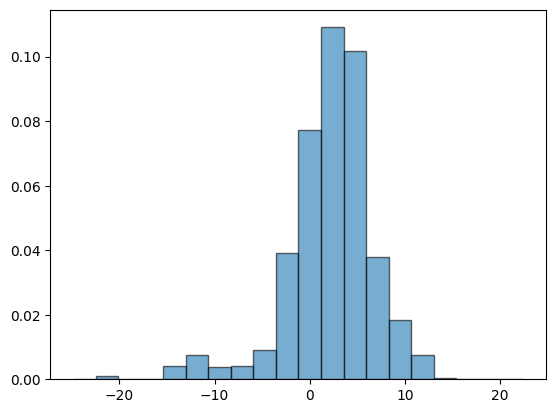

In [22]:
import matplotlib.pyplot as plt
idx=1
# Plot histogram as normalized (probability density)
plt.hist(y_tensor[:, idx], bins=20, edgecolor='black', alpha=0.6, density=True, label='merged_df')
plt.hist(y_test[:, idx], bins=20, edgecolor='black', alpha=0.6, density=True, label='test_df')

plt.title('Normalized Histogram of Angle')
plt.xlabel('Age')
plt.ylabel('Density')  # not Frequency, since we're using density=True
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
plt.subplot(2,1,1)
plt.plot(y_tensor[:,0])
plt.subplot(2,1,2)
plt.plot(clean_y[:,0])

plt.show()


In [ ]:
import numpy as np

# Replace with your actual .npz path
npz_path = 'model_weights.npz'

try:
    data = np.load(npz_path)
    print(f"Loaded .npz file: {npz_path}")
    print(f"Found {len(data.files)} arrays:\n")

    for key in data.files:
        arr = data[key]
        shape = arr.shape
        ndim = arr.ndim

        # Heuristic classification:
        if ndim == 2:
            # 2D weight: likely Linear.weight
            # shape = (out_features, in_features)
            print(f"  - {key}: shape={shape}, dtype={arr.dtype} => likely Linear.weight")
        elif ndim == 1:
            # 1D: could be LayerNorm.weight or LayerNorm.bias or Linear.bias.
            
            if key.endswith('.weight'):
                # 1D weight: if preceding layer is LayerNorm(prev_dim), then this is LayerNorm.weight.
                print(f"  - {key}: shape={shape}, dtype={arr.dtype} => 1D weight: likely LayerNorm.weight")
            elif key.endswith('.bias'):
                # 1D bias: could be LayerNorm.bias or Linear.bias.
                print(f"  - {key}: shape={shape}, dtype={arr.dtype} => 1D bias: LayerNorm.bias or Linear.bias")
            else:
                print(f"  - {key}: shape={shape}, dtype={arr.dtype} => 1D array: unknown role")
        else:
            print(f"  - {key}: shape={shape}, dtype={arr.dtype} => unexpected ndim={ndim}")

    
    print("\nAdditional check for 1D bias vs LayerNorm.bias:")
    for key in data.files:
        if key.endswith('.bias') and data[key].ndim == 1:
            idx = key.split('.')[1]  # 'ffn.<idx>.bias'
            weight_key = f"ffn.{idx}.weight"
            if weight_key in data.files:
                w = data[weight_key]
                if w.ndim == 1 and w.shape == data[key].shape:
    
                    role = "LayerNorm.bias (matched 1D weight)"
                elif w.ndim == 2 and w.shape[0] == data[key].shape[0]:
                    # weight is 2D with out_features equal bias length → Linear.bias
                    role = "Linear.bias (matched 2D weight out_features)"
                else:
                    role = "Unknown bias role"
            else:
                role = "No matching weight key; unknown"
            print(f"  - {key}: shape={data[key].shape} => {role}")

except FileNotFoundError:
    print(f"File not found: {npz_path}. Please ensure the file exists or update the path.")
except Exception as e:
    print(f"An error occurred while loading or processing the npz file: {e}")


In [43]:
import torch
from torch.utils.data import TensorDataset, DataLoader, random_split
import torch.nn as nn
import numpy as np
from model import  Skeleton2Mesh
# 2) Load test data
X_test, y_test = torch.load('test.pt',weights_only=False)

# 1) Device 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 3) Hyperparameters / model config
num_joints    = 20
num_bones     = 19
gsd_dim       = 100
mlp_hidden    = [512, 512]
pe_freqs_bone = 5
pe_freqs_order= 2

# 4) Instantiate model and load checkpoint
model = Skeleton2Mesh(
    num_joints=num_joints,
    num_bones=num_bones,
    gsd_dim=gsd_dim,
    mlp_hidden=mlp_hidden,
    pe_freqs_bone=pe_freqs_bone,
    pe_freqs_order=pe_freqs_order
).to(device)

# Path to saved checkpoint
checkpoint_path = "checkpoint_euler_epoch1000_ver6.pth"  # 실제 파일명으로 변경
# checkpoint_path = "checkpoint_epoch900.pth"  # 실제 파일명으로 변경

# Load checkpoint
checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()  # set to evaluation mode




# Create DataLoader
batch_size = 64  
test_dataset = TensorDataset(X_test, y_test)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

# 6) Define evaluation metrics
mse_loss_fn = nn.MSELoss(reduction='mean')
mae_loss_fn = nn.L1Loss(reduction='mean')

# Optional: per-dimension metrics
num_outputs = y_test.shape[1]  # e.g. 8

# Containers for aggregated results
total_mse = 0.0
total_mae = 0.0
num_samples = 0

# If you want per-output errors, accumulate sums:
sum_sq_errors = torch.zeros(num_outputs, device=device)
sum_abs_errors = torch.zeros(num_outputs, device=device)

# 7) Evaluation loop
with torch.no_grad():
    for skeletons_flat_batch, angles_batch in test_loader:
        skeletons_flat_batch = skeletons_flat_batch.to(device)  # [B, num_joints*3]
        angles_batch         = angles_batch.to(device)         # [B, 8]

        # Forward pass
        preds = model(skeletons_flat_batch)  # [B, 8]

        # Compute batch losses
        batch_mse = mse_loss_fn(preds, angles_batch)  # scalar
        batch_mae = mae_loss_fn(preds, angles_batch)  # scalar

        # Accumulate weighted by batch size
        B = skeletons_flat_batch.size(0)
        total_mse += batch_mse.item() * B
        total_mae += batch_mae.item() * B
        num_samples += B

        # Per-output accumulation
        # Compute squared error and abs error per sample per dimension
        diff = preds - angles_batch  # [B, 8]
        sum_sq_errors += torch.sum(diff * diff, dim=0)    # [8]
        sum_abs_errors += torch.sum(torch.abs(diff), dim=0)  # [8]

# 8) Final metrics
mean_mse = total_mse / num_samples
mean_mae = total_mae / num_samples

# Per-output RMSE and MAE
rmse_per_output = torch.sqrt(sum_sq_errors / num_samples)  # [8]
mae_per_output  = sum_abs_errors / num_samples            # [8]

print(f"Test MSE (mean over all outputs): {mean_mse:.6f}")
print(f"Test MAE (mean over all outputs): {mean_mae:.6f}")
print("Per-output RMSE:", rmse_per_output.cpu().numpy())
print("Per-output MAE: ", mae_per_output.cpu().numpy())

Test MSE (mean over all outputs): 5.117178
Test MAE (mean over all outputs): 1.681019
Per-output RMSE: [2.7140417 1.9888065 2.007526 ]
Per-output MAE:  [2.0522032 1.4475751 1.5432777]


In [27]:
# 1. Imports and Hyperparameters
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import TensorDataset, random_split, DataLoader
from tqdm import tqdm
from new_model import DHAmodel

# Hyperparameters
INPUT_DIM     = 63    # dimension of input feature vector
TARGET_DIM    = 3     # dimension of target (joint angles per head)
BATCH_SIZE    = 256
LEARNING_RATE = 1e-4
NUM_EPOCHS    = 1000
DEVICE        = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 2. Load dataset
X_test, y_test = torch.load('test.pt',weights_only=False)

# 3. Model, Loss, Optimizer, Scheduler
model     = DHAmodel().to(DEVICE)
criterion = nn.MSELoss()    # use MSE for regression
optimizer = optim.AdamW(
    model.parameters(), lr=LEARNING_RATE, weight_decay=1e-5
)
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(
    optimizer, T_0=NUM_EPOCHS, T_mult=2, eta_min=1e-4
)

# Path to saved checkpoint
checkpoint_path = "dha_model_epoch1000.pth"  
# checkpoint_path = "checkpoint_epoch900.pth"

# Load checkpoint
checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint)
model.eval()  # set to evaluation mode

batch_size = 64  
test_dataset = TensorDataset(X_test, y_test)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

# 6) Define evaluation metrics
mse_loss_fn = nn.MSELoss(reduction='mean')
mae_loss_fn = nn.L1Loss(reduction='mean')

# Optional: per-dimension metrics
num_outputs = y_test.shape[1]  # e.g. 8

# Containers for aggregated results
total_mse = 0.0
total_mae = 0.0
num_samples = 0

# If you want per-output errors, accumulate sums:
sum_sq_errors = torch.zeros(num_outputs, device=device)
sum_abs_errors = torch.zeros(num_outputs, device=device)

# 7) Evaluation loop
with torch.no_grad():
    for skeletons_flat_batch, angles_batch in test_loader:
        skeletons_flat_batch = skeletons_flat_batch.to(device)  # [B, num_joints*3]
        angles_batch         = angles_batch.to(device)         # [B, 8]

        # Forward pass
        preds = model(skeletons_flat_batch)  # [B, 8]

        # Compute batch losses
        batch_mse = mse_loss_fn(preds, angles_batch)  # scalar
        batch_mae = mae_loss_fn(preds, angles_batch)  # scalar

        # Accumulate weighted by batch size
        B = skeletons_flat_batch.size(0)
        total_mse += batch_mse.item() * B
        total_mae += batch_mae.item() * B
        num_samples += B

        # Per-output accumulation
        # Compute squared error and abs error per sample per dimension
        diff = preds - angles_batch  # [B, 8]
        sum_sq_errors += torch.sum(diff * diff, dim=0)    # [8]
        sum_abs_errors += torch.sum(torch.abs(diff), dim=0)  # [8]

# 8) Final metrics
mean_mse = total_mse / num_samples
mean_mae = total_mae / num_samples

# Per-output RMSE and MAE
rmse_per_output = torch.sqrt(sum_sq_errors / num_samples)  # [8]
mae_per_output  = sum_abs_errors / num_samples            # [8]

print(f"Test MSE (mean over all outputs): {mean_mse:.6f}")
print(f"Test MAE (mean over all outputs): {mean_mae:.6f}")
print("Per-output RMSE:", rmse_per_output.cpu().numpy())
print("Per-output MAE: ", mae_per_output.cpu().numpy())

FileNotFoundError: [Errno 2] No such file or directory: 'dha_model_epoch1000.pth'

In [44]:
# index
index = 791 

# 1) prediction
x_sample = X_test[index].unsqueeze(0).to(device)  # [1, input_dim]
y_true   = y_test[index].cpu().numpy()            # [output_dim]

model.eval()
with torch.no_grad():
    y_pred = model(x_sample).cpu().numpy().flatten()  # [output_dim]

# 2) result
print(f"Index: {index}")
print("Predicted:", y_pred)
print("Ground Truth:", y_true)


print("Absolute Error:", np.abs(y_pred - y_true))


Index: 791
Predicted: [-5.405766   -0.33669245 13.235459  ]
Ground Truth: [-6.366972   -0.25431097 12.1408205 ]
Absolute Error: [0.96120596 0.08238149 1.0946388 ]


In [45]:
# Ensure model is in eval mode
model.eval()


all_preds = []
all_targets = []

with torch.no_grad():
    for x_batch, y_batch in test_loader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)

        preds = model(x_batch)

        all_preds.append(preds.cpu())
        all_targets.append(y_batch.cpu())


all_preds_tensor = torch.cat(all_preds, dim=0)       # shape [N, output_dim]
all_targets_tensor = torch.cat(all_targets, dim=0)   # shape [N, output_dim]


mse_per_sample = torch.mean((all_preds_tensor - all_targets_tensor) ** 2, dim=1)  # shape [N]


max_mse_value, max_mse_index = torch.max(mse_per_sample, dim=0)


y_pred_max = all_preds_tensor[max_mse_index].numpy()
y_true_max = all_targets_tensor[max_mse_index].numpy()


print(f"Index with Maximum MSE: {max_mse_index.item()}")
print(f"Maximum MSE value: {max_mse_value.item():.6f}")
print("Predicted   :", y_pred_max)
print("Ground Truth:", y_true_max)
print("Abs Error   :", np.abs(y_pred_max - y_true_max))


Index with Maximum MSE: 1113
Maximum MSE value: 59.725327
Predicted   : [11.929693   1.6969775 12.94129  ]
Ground Truth: [-1.2303996 -0.7215498 13.313663 ]
Abs Error   : [13.160093    2.4185274   0.37237263]


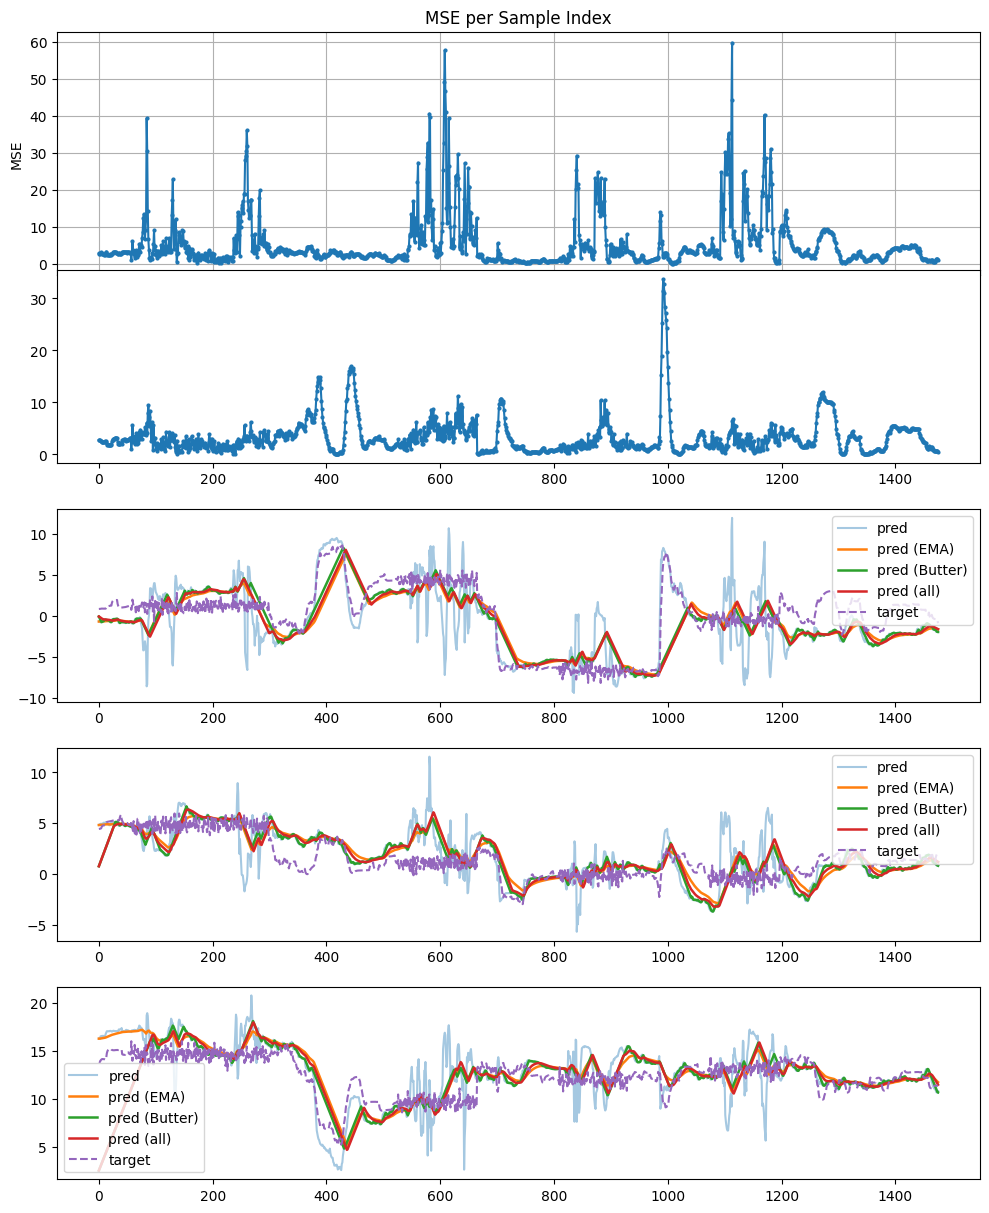

In [47]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# ---------------------------
# 1. EMA filter
# ---------------------------
def apply_ema(tensor: torch.Tensor, alpha: float = 0.1) -> torch.Tensor:
    """
    Apply EMA (Exponential Moving Average) to each column of a 2D tensor.
    """
    df = pd.DataFrame(tensor.numpy())
    ema_df = df.ewm(alpha=alpha, adjust=False).mean()
    return torch.tensor(ema_df.values, dtype=tensor.dtype)

# ---------------------------
# 2. Butterworth filter
# ---------------------------
def apply_butterworth(tensor: torch.Tensor, cutoff: float, fs: float, order: int = 2) -> torch.Tensor:
    """
    Apply Butterworth low-pass filter to each column of a 2D tensor.
    """
    b, a = butter(N=order, Wn=cutoff / (fs / 2), btype='low')
    tensor_np = tensor.numpy()
    filtered_np = np.zeros_like(tensor_np)
    
    for i in range(tensor_np.shape[1]):
        filtered_np[:, i] = lfilter(b, a, tensor_np[:, i])
    
    return torch.tensor(filtered_np, dtype=tensor.dtype)

# ---------------------------
# 3. filtering
# ---------------------------
ema_preds_tensor     = apply_ema(all_preds_tensor, alpha=0.05)
butter_preds_tensor  = apply_butterworth(all_preds_tensor, cutoff=10.0, fs=60.0, order=2)
all_filter_preds_tensor     = apply_ema(butter_preds_tensor, alpha=0.1)
# butter_preds_tensor = ema_preds_tensor

# ---------------------------
# 4. visualize
# ---------------------------
plt.figure(figsize=(10,12))

plt.subplot(4,1,1)
plt.plot(mse_per_sample.numpy(), marker='o', linestyle='-', markersize=2)
plt.title('MSE per Sample Index')
plt.xlabel('Sample Index')
plt.ylabel('MSE')
plt.grid(True)
plt.tight_layout()

mse_ema_sample = torch.mean((ema_preds_tensor - all_targets_tensor) ** 2, dim=1)  # shape [N]

plt.subplot(5,1,2)
plt.plot(mse_ema_sample.numpy(), marker='o', linestyle='-', markersize=2)

prev_butter = butter_preds_tensor[0,:]
prev_ema = ema_preds_tensor[0,:]
prev_all = all_filter_preds_tensor[0,:]

for i in range(1,len(butter_preds_tensor)):
    butter_preds_tensor[i,:] = np.clip(butter_preds_tensor[i,:],-0.15 + prev_butter,0.15+ prev_butter)
    ema_preds_tensor[i,:] = np.clip(ema_preds_tensor[i,:],-0.15 + prev_ema,0.15+ prev_ema)
    all_filter_preds_tensor[i,:] = np.clip(all_filter_preds_tensor[i,:],-0.15 + prev_all,0.15+ prev_all)
    prev_butter = butter_preds_tensor[i,:]
    prev_ema = ema_preds_tensor[i,:]
    prev_all = all_filter_preds_tensor[i,:]

for i in range(2,5):
    plt.subplot(5,1,i+1)
    plt.plot(all_preds_tensor[:, i-2], label="pred", alpha=0.4)
    plt.plot(ema_preds_tensor[:, i-2], label="pred (EMA)", linewidth=1.8)
    plt.plot(butter_preds_tensor[:, i-2], label="pred (Butter)", linewidth=1.8)
    plt.plot(all_filter_preds_tensor[:, i-2], label="pred (all)", linewidth=1.8)
    plt.plot(all_targets_tensor[:, i-2], label="target", linestyle='--')
    plt.legend()

plt.show()


In [ ]:
plt.figure(figsize=(6, 4))
plt.hist(mse_per_sample.numpy(), bins=50, edgecolor='black')
plt.title('Histogram of MSE per Sample')
plt.xlabel('MSE Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()